# Building and training a single layer neural network by hand

In [3]:
# Import packages
import pandas as pd
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline

## Defining the model

As mentioned previously, our model is 

$ p_{setosa} = f( w_0 + w_1 \times width + w_2 \times length ) \qquad with \;\; f(x) = 1/(1 + e^{-x})$

Let us define this using Python:

In [4]:
def probability_setosa( petal_length, petal_width, w0, w1, w2 ):
    "Return the probability that a given specimen belongs to the species setosa"
    # Compute sum of features times weights
    x = w0 + w1*petal_width + w2*petal_length
    # Apply non-linear function: sigmoid
    p = 1./( 1. + np.exp( -x ) )
    return( p )

## Training the network: finding the right weights so that the model fits the training data

In order to get a sense of what training the network implies, we will try to find the right weights *by hand*. Once, we use Keras, this process will be automated.

Let us first load the data from the training set.

In [5]:
df = pd.read_csv('./data/setosa/train.csv')
df.head(10)

,petal length (cm),petal width (cm),setosa
0,1.3,0.2,1
1,1.6,0.4,1
2,4.7,1.2,0
3,5.5,2.1,0
4,1.3,0.3,1
5,3.7,1.0,0
6,6.7,2.2,0
7,4.4,1.4,0
8,1.5,0.4,1
9,5.4,2.1,0


We then define a function that plots the prediction of the model **for a given set of weights**, along with the training data.

In [10]:
def plot_model( w0, w1, w2 ):
    "Plot the model, along with the training data."

    # Calculate the probability on a mesh
    petal_width_mesh, petal_length_mesh = \
        np.meshgrid( np.linspace(0,3,100), np.linspace(0,8,100) )
    p = probability_setosa( petal_width_mesh, petal_length_mesh, w0, w1, w2 )
    # Plot the probability on the mesh
    plt.clf()
    plt.imshow( p.T, extent=[0,3,0,8], origin='lower', 
               vmin=0, vmax=1, cmap='RdBu', aspect='auto', alpha=0.5 )
    # Plot the data points
    plt.scatter( df['petal width (cm)'], df['petal length (cm)'], c=df['setosa'], cmap='RdBu')
    plt.xlabel('petal width (cm)')
    plt.ylabel('petal length (cm)')
    cb = plt.colorbar()
    cb.set_label('setosa')

We can then use the function `interact` of `ipywidgets` to call this function with adjustable weights:

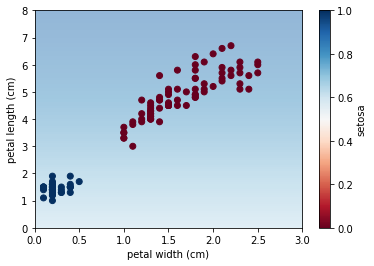

<function __main__.plot_model>

In [11]:
interact( plot_model, w0=(-4.,5.), w1=(-2.,2.), w2=(-2., 3.))

In [14]:
# Optimal weights: fill these values
w0 = 2.8
w1 = -0.8
w2 = 0.0

## Performing predictions on the test sets

Now that we trained the model by finding the optimal weights for the training dataset, let us perform predictions on the test dataset.

Let us first load the test set.

In [12]:
df_test = pd.read_csv('./data/setosa/test.csv')
df_test.head(10)

,petal length (cm),petal width (cm),setosa
0,4.2,1.5,0
1,5.6,2.1,0
2,1.5,0.2,1
3,4.9,2.0,0
4,4.9,1.5,0
5,6.7,2.0,0
6,5.0,2.0,0
7,5.2,2.3,0
8,4.4,1.4,0
9,1.3,0.2,1


We can now check the accuracy of our model on the first point for instance:

In [15]:
probability_setosa( 4.2, 1.5, w0, w1, w2 )

0.83201838513392445

More generally, by using pandas syntax, we can perform predictions on the whole dataset:

In [17]:
df_test['probability_setosa_predicted'] = \
    probability_setosa( df_test['petal length (cm)'], df_test['petal width (cm)'], w0, w1, w2 )

In [18]:
df_test

,petal length (cm),petal width (cm),setosa,probability_setosa_predicted
0,4.2,1.5,0,0.832018
1,5.6,2.1,0,0.753989
2,1.5,0.2,1,0.933392
3,4.9,2.0,0,0.768525
4,4.9,1.5,0,0.832018
5,6.7,2.0,0,0.768525
6,5.0,2.0,0,0.768525
7,5.2,2.3,0,0.723122
8,4.4,1.4,0,0.842905
9,1.3,0.2,1,0.933392


### Next steps

While the above procedure yields good results, it is very cumbersome to try to find the weights by hand. Let us use keras [here](Single_layer_keras.ipynb) to automate this process.